# Motor tools examples and documentation

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import gdspy
import motor_tools
import myGdspy
from IPython.display import SVG ##to display layout directly

In [3]:
gdspy.__version__
lib = gdspy.GdsLibrary()


## Flexures
Draw flexures with anchor 

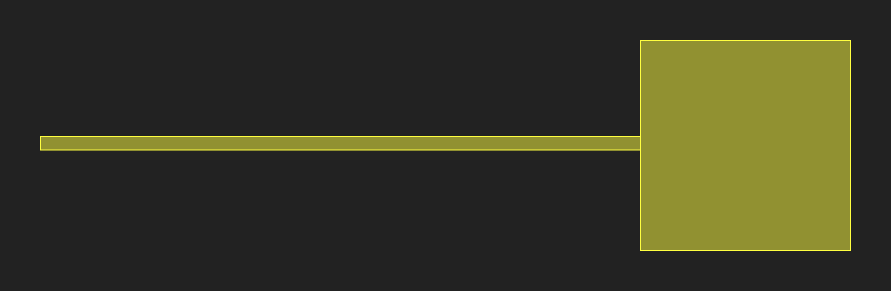

In [4]:
spring_length = 200
spring_width = 3
anchor_width = 70
layer = motor_tools.SOI
not_layer = motor_tools.SOI_HOLE
flexure_cell = motor_tools.SingleFlexure('flexure', lib, spring_length, spring_width, anchor_width, layer = layer,datatype = 0)
##layer and datatype set by default if none is provided
filename = 'flexure_temp.svg'
flexure_cell.write_svg(filename, scaling = 3)
SVG(filename=filename)

## Compute anchors
Use compute anchors to check etching. This can be done with any cell

In [5]:
undercut = [1, 3, 5]
for und in undercut:
    motor_tools.compute_anchors(flexure_cell, und, layer, not_layer=not_layer, output_datatype= und)
filename = 'release_flex_temp.svg'
flexure_cell.write_svg(filename, scaling=3)
# SVG(filename)

In [6]:
gdspy.current_library.name

'library'

In [7]:
lib.name

'library'

## Etch holes for structures
Draw structures and add etcholes in different ways

Anchors at PolygonSet (436 polygons, 63442 vertices, layers [3], datatypes [3])
etch_hole_examples  is not anchored
Anchors at None : should say None


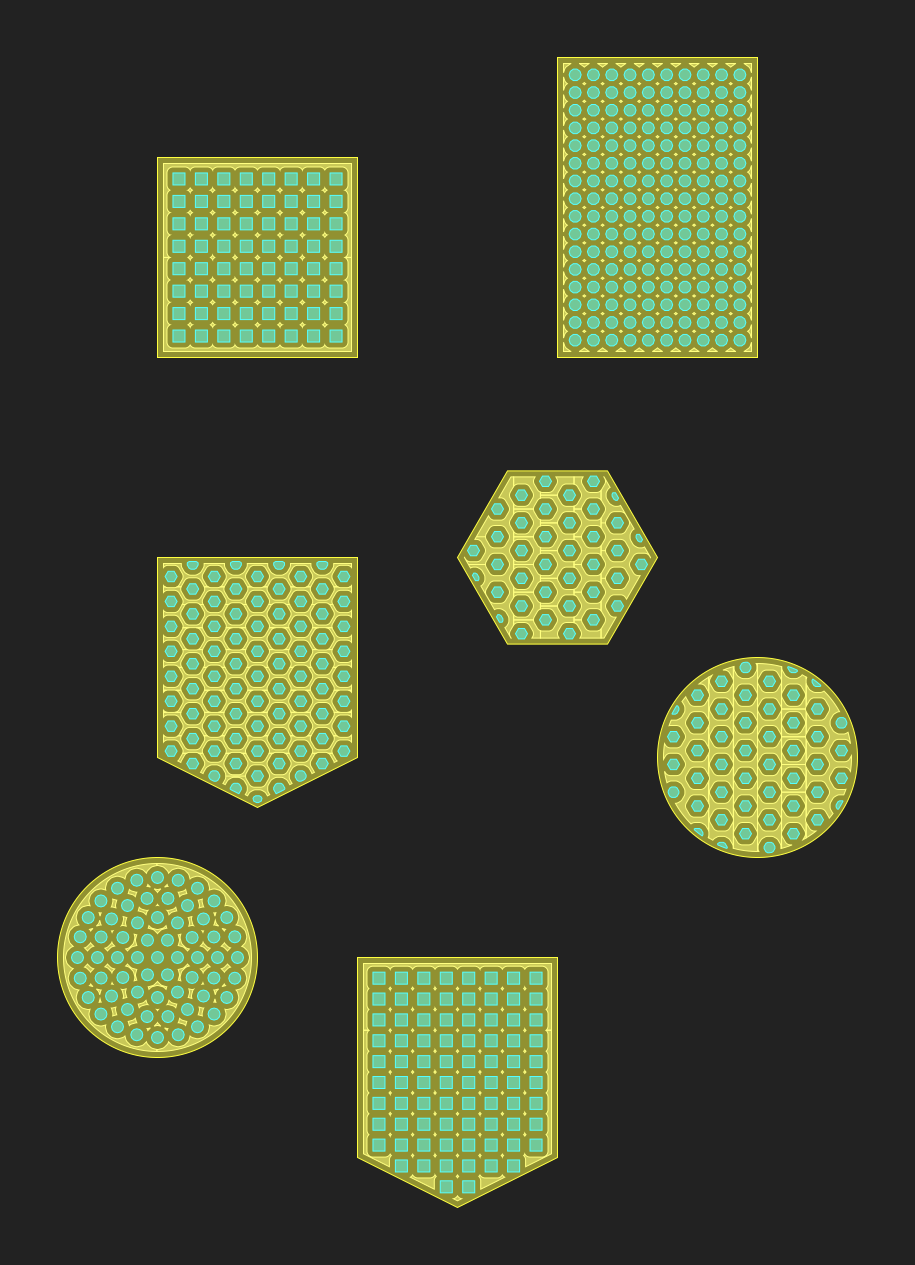

In [8]:
filename = 'etch_holes_temp.svg'
etch_cell = lib.new_cell('etch_hole_examples')
undercut = motor_tools.UNDERCUT
rectangle = gdspy.Rectangle((0,0), (100,100), layer = layer, datatype=0)
etch_holes = motor_tools.add_etch_holes(rectangle, hole_size=6, undercut=undercut, 
                                        not_layer=not_layer, shape = 'square', geometry='manhattan', lib = lib)
etch_cell.add(rectangle)
etch_cell.add(etch_holes)
#now using circular etch holes
rectangle= gdspy.Rectangle((200,0), (300, 150), layer=layer, datatype=0)
etch_holes = motor_tools.add_etch_holes(rectangle, hole_size=6, undercut=undercut, not_layer=not_layer, shape = 'circle', lib=lib)
etch_cell.add(rectangle)
etch_cell.add(etch_holes)

# now using hex tiling. Note weird shapes may require extra tolerance (lower undergut)
pts = [(0, -200), (50, -225), (100, -200), (100,-100), (0, -100)]
polygon = gdspy.Polygon(pts, layer = layer, datatype= 0)
etch_holes = motor_tools.add_etch_holes(polygon, 6, undercut*0.8, not_layer=not_layer, 
                                        shape = 'circle', num_of_points=6, geometry='hex', lib = lib)
etch_cell.add(polygon)
etch_cell.add(etch_holes)

#same shape, using manhattan geometry ++function
poly2 = gdspy.copy(polygon, 100, -200)
holes = motor_tools.add_etch_holes(poly2, 6, 6, not_layer, shape = 'square', geometry='manhattan', 
                                   smaller_allowed=False, lib =lib)
etch_cell.add(poly2)
etch_cell.add(holes)

##hex may not cover edges very well, check release
circle = gdspy.Round((200,-100),50, layer = layer, datatype=0, number_of_points=6)
etch_holes = motor_tools.add_etch_holes(circle,6, undercut, not_layer=not_layer, shape = 'circle', num_of_points=6, geometry='hex', lib = lib)
etch_cell.add(circle)
etch_cell.add(etch_holes)

circle = gdspy.Round((300,-200),50, layer = layer, datatype=0)
etch_holes = motor_tools.add_etch_holes(circle,6, undercut, not_layer=not_layer, shape = 'circle', num_of_points=6, geometry='hex', lib= lib)
etch_cell.add(circle)
etch_cell.add(etch_holes)

circle = gdspy.Round((0,-300),50, layer = layer, datatype=0)
etch_holes = motor_tools.add_etch_holes(circle,6, undercut, not_layer=not_layer, shape = 'circle', num_of_points=12, geometry='rings', lib = lib)
etch_cell.add(circle)
etch_cell.add(etch_holes)

anchors = motor_tools.compute_anchors(etch_cell, undercut = undercut/2, layer = layer, output_datatype=int(undercut/2))
print('Anchors at', anchors)
anchors = motor_tools.compute_anchors(etch_cell, undercut = undercut, layer = layer, output_datatype=undercut)
print('Anchors at', anchors, ': should say None')    
etch_cell.write_svg(filename, scaling = 2)
SVG(filename)


Test for smart etchholes. This tool takes existing etch holes and expands them if necessary. This is particularly useful for structures composed of several parts. 

In [9]:
smart_cell = lib.new_cell('Recursive_EH')
dumb_cell = lib.new_cell('Compound_etch_holes')

In [10]:
shape1 = gdspy.copy(polygon)
shape2 = gdspy.Rectangle((100,-200), (300, 20), layer = shape1.layers[0])
smart_cell.add((shape1,shape2))
dumb_cell.add((shape1,shape2))

In [11]:
etch_holes_dumb = motor_tools.add_etch_holes(dumb_cell.get_polygonsets(), 6, undercut = undercut, not_layer = not_layer, smaller_allowed=False, lib = lib, shape = 'square', geometry='manhattan')
dumb_cell.add(etch_holes_dumb)
motor_tools.compute_anchors(dumb_cell, undercut=undercut, layer = shape1.layers[0])

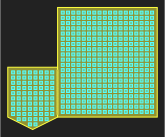

In [12]:
dumb_cell.write_svg('first_temp.svg', scaling=0.5)
SVG('first_temp.svg')

In [13]:
etch_holes_smart = motor_tools.expand_etch_holes_smart(
    smart_cell.get_polygonsets(), etch_holes_dumb, layer, not_layer, undercut, 6, lib)
smart_cell.add(etch_holes_smart)
motor_tools.compute_anchors(smart_cell, undercut, shape1.layers[0], not_layer)

Release_test_cell1535346957696_2  is not anchored
Structure is released after 2 iterations 
Recursive_EH  is not anchored


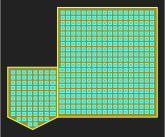

In [14]:
smart_cell.write_svg('first_temp.svg', scaling=0.5)
SVG('first_temp.svg')

# GCA
gap closing actuators with different geometries

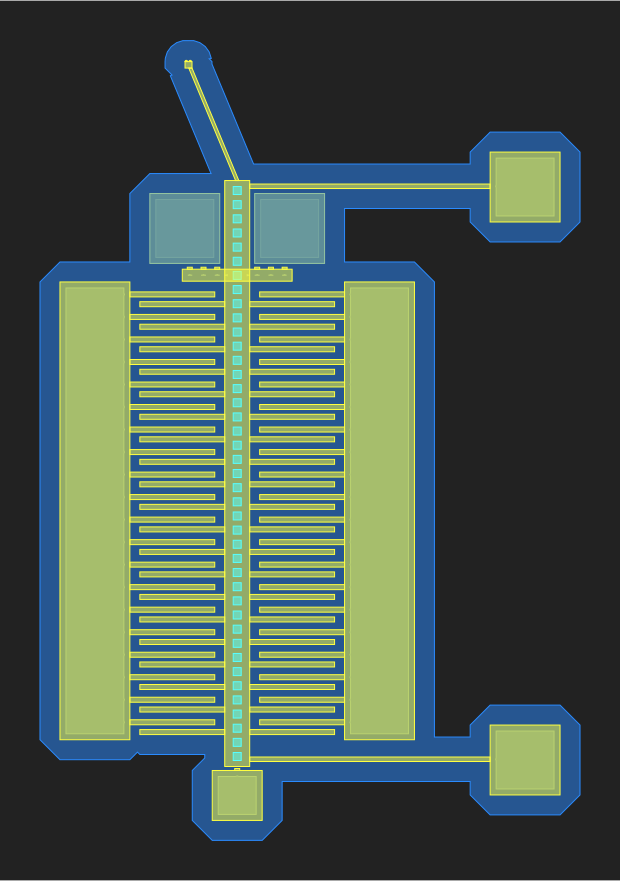

In [15]:
filename = 'GCA_temp.svg'

rotor = motor_tools.GCA('rotor', lib, 40)
rotor.draw()

anchors = motor_tools.compute_anchors(rotor, undercut, layer = layer)
not_dummy = motor_tools.compute_anchors(rotor, -20, layer= layer, output_layer=10, output_datatype=0)

rotor.write_svg(filename, scaling =1)
SVG(filename)

In [16]:
anch = gdspy.boolean(anchors.polygons, None, 'or', max_points = 100000)

In [17]:
len(anch.polygons)

15

In [18]:
anchor = anch.polygons[0]
diff= anchor - np.array([0,0])
arg = np.argmin(np.linalg.norm(diff, axis =1))
thisdiff = diff[arg,:]
thisdiff

array([259.3, 551.3])

In [19]:
filename = 'GCA_temp.svg'
motor_vars = lib.new_cell('motor_variations')
rotor = motor_tools.GCA(None, lib, 40, finger_length= 120,arm_angle= 57, bar_ext = 60)
rotor.draw()

anchors = motor_tools.compute_anchors(rotor, undercut, layer = layer, output_datatype= undercut)
not_dummy = motor_tools.compute_anchors(rotor, -20, layer= layer, output_layer=10, output_datatype=0)

motor_vars.add(gdspy.CellReference(rotor, -rotor.get_contact_point()[0]))
##add a reference 90 degrees off
rotated = gdspy.CellReference(rotor, rotation = 90)
rotated.translate(-motor_tools.get_contact_point(rotated)[0][0]+200, -motor_tools.get_contact_point(rotated)[0][1]+00)
motor_vars.add(rotated)

#this example flips the flexures and omitts the gap stop
rotor2 =  motor_tools.GCA(None, lib, 40, finger_length= 120,arm_angle= 57, bar_ext = 60)
rotor2.draw_rotor_shuttle()
rotor2.draw_back_stop()
rotor2.draw_flexures(left = True)
rotor2.draw_capacitor_fingers()
rotor2.draw_stator_anchors()
# rotor2.draw_gap_stop()
rotor2.draw_angle_arm()
rotor2.add(gdspy.CellReference(rotor2.rotor))
rotor2.add(gdspy.CellReference(rotor2.stator))

motor_vars.add(gdspy.CellReference(rotor2, -rotor2.get_contact_point()[0]+np.array([-600,0])))

## this example flips only one flexure
rotor2 =  motor_tools.GCA(None, lib, 40, finger_length= 120,arm_angle= 57, bar_ext = 60)
rotor2.draw()
rotor2.flexure_ref[1].rotation = rotor2.flexure_ref[1].rotation + 180
rotor2.flexure_ref[1].origin = rotor2.flexure_ref[1].origin + np.array([-rotor2.bar_width,0])
motor_vars.add(gdspy.CellReference(rotor2, -rotor2.get_contact_point()[0]+np.array([0,800])))


## now we remove the rotor and keep everything else
rotor2 =  motor_tools.GCA(None, lib, 40, finger_length= 120,arm_angle= 57, bar_ext = 60)
rotor2.draw()
# lib.remove(rotor2.rotor) #removes rotor from library
motor_vars.add(gdspy.CellReference(rotor2, -rotor2.get_contact_point()[0]+np.array([-600,800]))) ##note how we can get information from the rotor before deleting it
for ref in rotor2.references:##this shows that changing the object works even after it has been referenced
    if ref.ref_cell == rotor2.rotor:
        rotor2.references.remove(ref)
text = gdspy.Text('motor variations', 20, (-300,0), layer = motor_tools.METAL, datatype = 0 )
motor_vars.add(text)
motor_vars.write_svg(filename, scaling =1)

#SVG(filename)

Trapezoidal fingers

In [20]:
rotor_triag = motor_tools.GCA(None, lib, 20, finger_length=100,  triangle_fingers=True)
rotor_triag.draw()

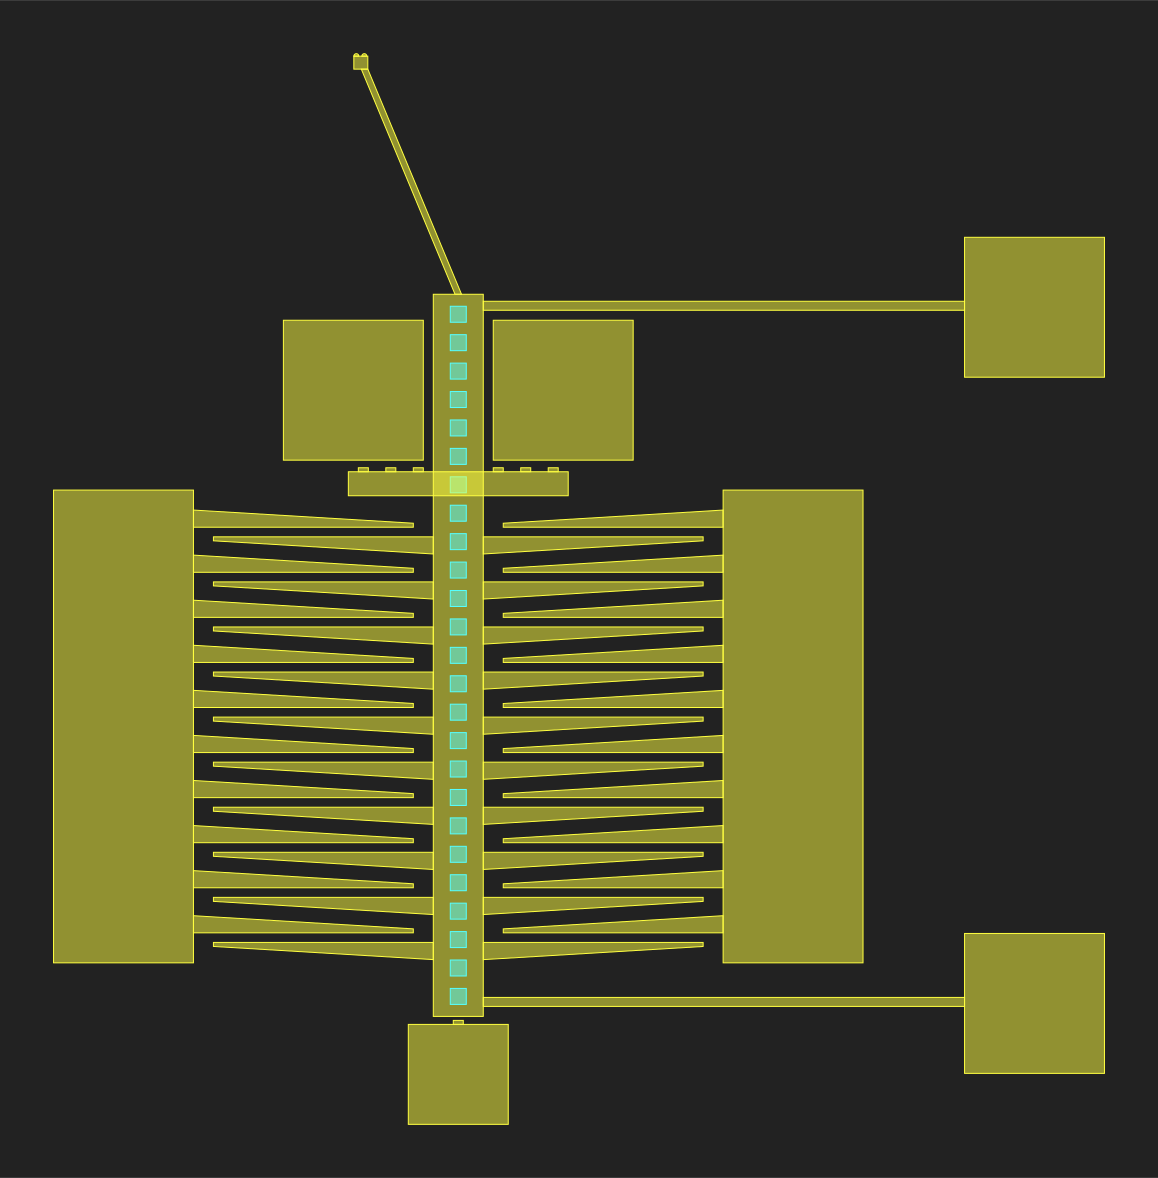

In [21]:
rotor_triag.write_svg('first_temp.svg', scaling =2)
SVG('first_temp.svg')

# GCA with parallel arrays 

In [22]:
gca_par = motor_tools.GCApar('ParGCA', lib, 50, finger_length=150,  triangle_fingers=True, spring_length=240)
gca_par.parallel_number(5, True)
gca_par.draw()

Cell ("GCA_ROT_1535346787712noarm", 0 polygons, 0 paths, 0 labels, 5 references)
Cell ("GCA_ROT_1535346787712noarm", 0 polygons, 0 paths, 0 labels, 5 references)


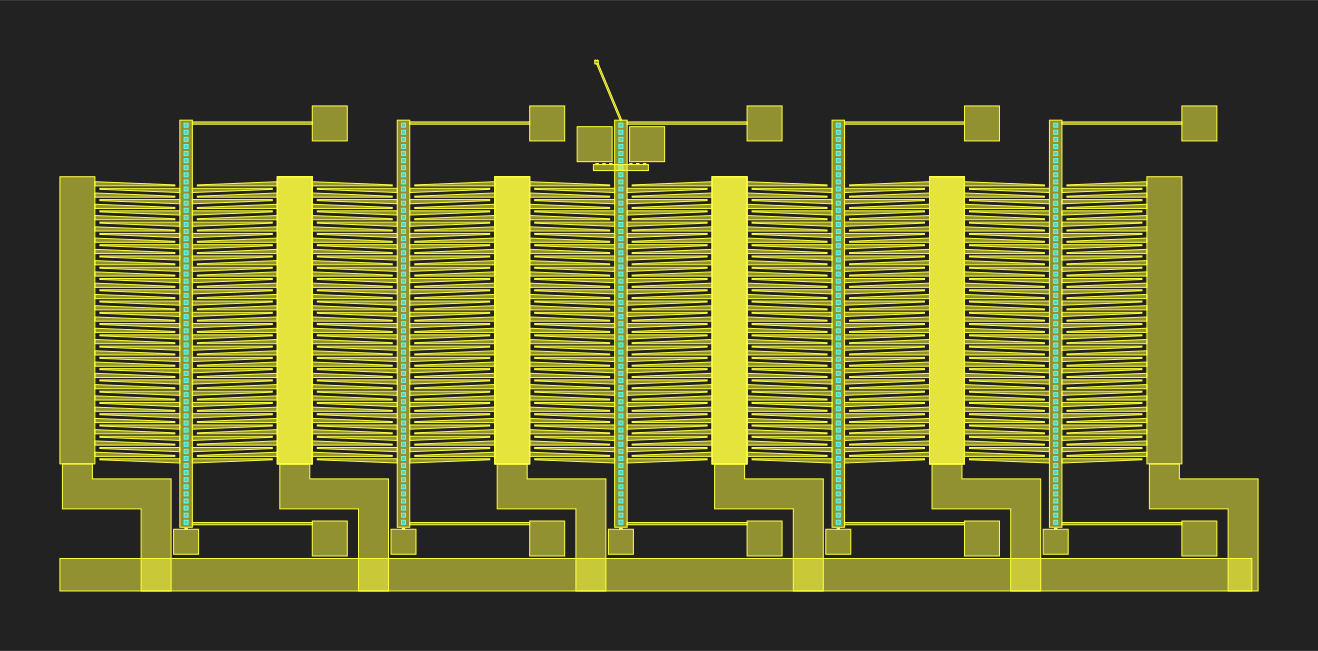

In [23]:
gca_par.write_svg('first_temp.svg', scaling = 0.5)
SVG('first_temp.svg') 

## Shuttle motion
The inchoworm motor has a function to translate the shuttle. Helps assess movability visually

In [24]:
rotor_triag.displace_rotor(amount=2, output_datatype=102)
motor_vars.write_svg(filename, scaling =1)

# SVG(filename)

In [25]:
text_cell = lib.new_cell('new_text')
text = myGdspy.myText('qwertyuiopasdfghjkl;zxcvbnm,. \n this font does not leave donuts \n 01234567890', 10, position=(0, 0), horizontal=True, angle=0, layer=0, datatype=0)
text_cell.add(text)

othertext = gdspy.Text('qwertyuiopasdfghjkl;zxcvbnm,. \n this font leaves donuts\n 01234567890', 10, position=(0, -40), horizontal=True, angle=0, layer=0, datatype=0)
text_cell.add(othertext)

text_cell.write_svg('text_temp.svg', scaling = 5)
# SVG('text_temp.svg')

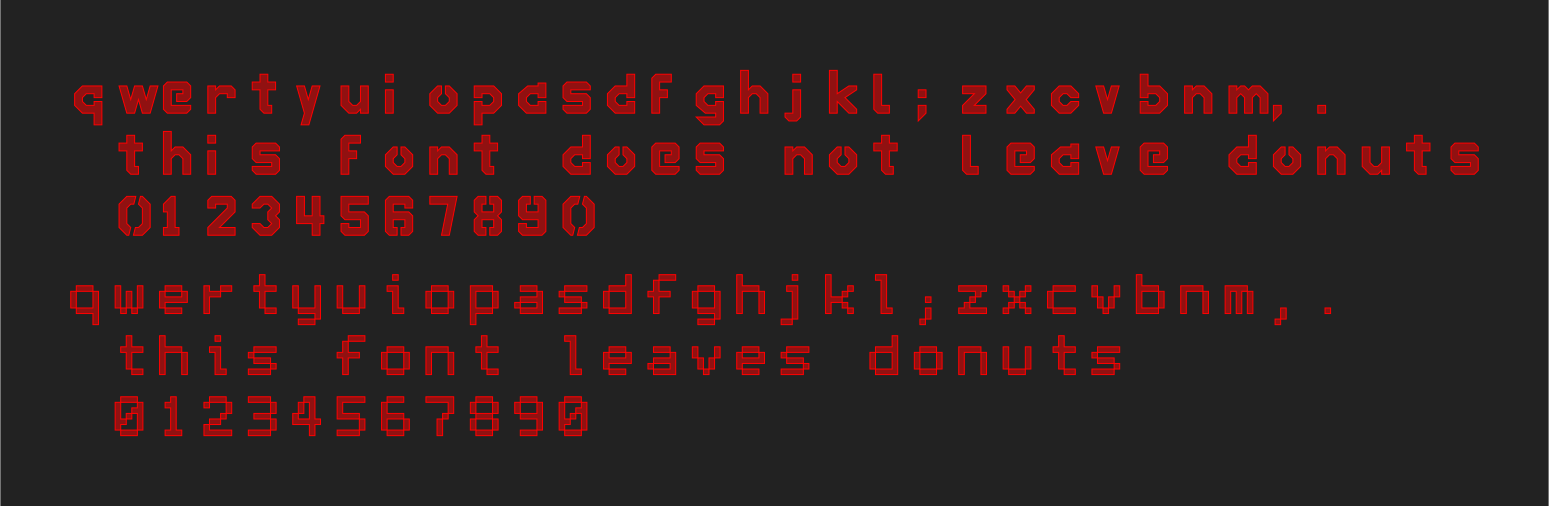

In [26]:
SVG('text_temp.svg')

In [27]:
spiral= motor_tools.SpiralSpring(None, lib, width = 10, center = (10,0), start_pt= (50,10), end_pt = (200,0), num_turns = 7)

In [28]:
spiral.draw()
pts = spiral.pts
pts.shape
spiral.add_anchor(extra =0.2)
spiral.path.arc

<bound method FlexPath.arc of <gdspy.path.FlexPath object at 0x000001657C491E00>>

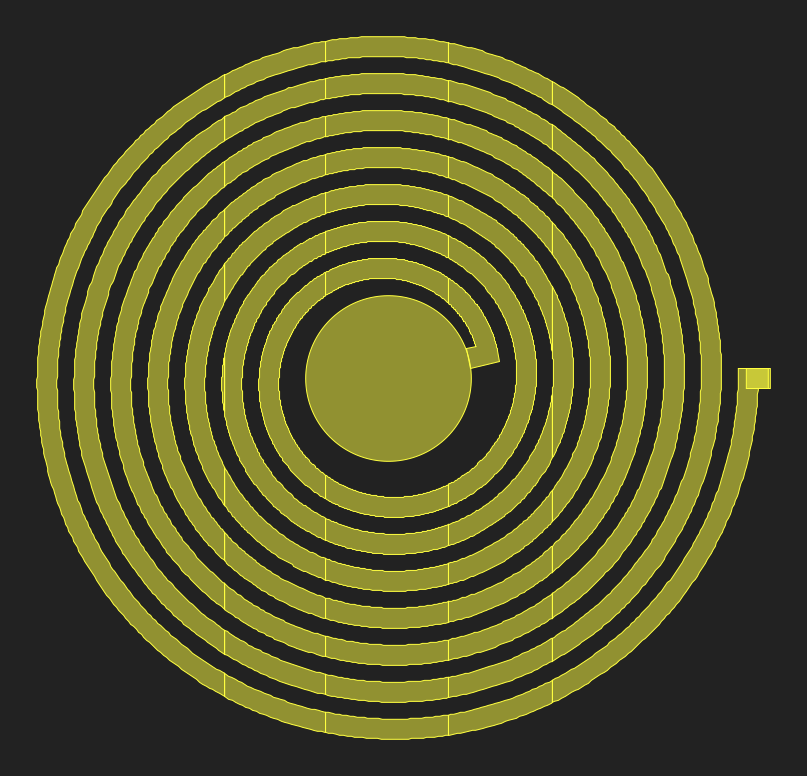

In [29]:
spiral.write_svg('first_temp.svg', scaling = 2)
SVG('first_temp.svg')

In [30]:
spiralL = motor_tools.SpiralSpringL(None, lib, 3, (0,0), 65*4*np.pi, (90,0), 50)

In [31]:
spiralL.draw()
spiralL.add_anchor()

In [32]:
length = 0
spiralL.path.points
for i in range(1,len(spiralL.path.points)):
    length += np.linalg.norm(spiralL.path.points[i] - spiralL.path.points[i-1])
length, 65*4*np.pi
np.sum(np.linalg.norm(spiralL.path.points[1:, :] - spiralL.path.points[0:-1, :], axis =1)), 65*4*np.pi

(837.0648676448475, 816.8140899333462)

In [33]:
spiralL.write_svg('first_temp.svg', scaling = 2)
# SVG('first_temp.svg')

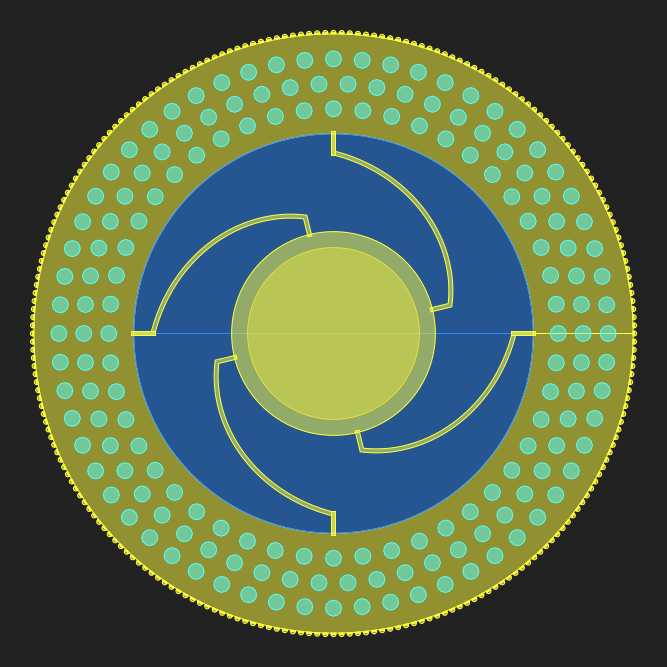

In [34]:
shuttle = motor_tools.RotShuttle(None, lib, (0,0), 100, 150, etch_size=8, etch_hole_params={'num_of_points': 12})
shuttle.draw_shuttle()
shuttle.draw_teeth(tooth_extension=0.5)
shuttle.spiralspring(100, 2, 100)
shuttle.spiral.opposite_spring()
shuttle.spiral.opposite_spring(np.pi/2)
shuttle.spiral.opposite_spring(-np.pi/2)
motor_tools.compute_anchors(shuttle,8, motor_tools.SOI)

shuttle.write_svg('first_temp.svg', scaling = 2 )
SVG('first_temp.svg')

Spring Gauge to test springs

In [35]:
sg = motor_tools.SpringGauge("SG", lib)
sg.draw()

Release_test_cell1535386570816_5  is not anchored
Structure is released after 5 iterations 


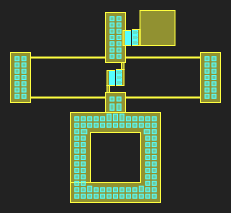

In [36]:
sg.write_svg('first_temp.svg',scaling = 0.5)
SVG('first_temp.svg')

In [37]:
handle = sg.bottom.get_polygonsets()

In [38]:
handle = [item for item in handle if item.layers[0] == sg.layer]

In [39]:
handle

 Rectangle((-20.0, 0.0), (20.0, -40.0), 3, 0)]

Extracted handle for smart etch hole test

In [40]:
smart_etch_cell = lib.new_cell('smart_etch_cell')

In [41]:
# pols = gdspy.PolygonSet(handle, layer = sg.layer, datatype=sg.datatype)
pols = handle
smart_etch_cell.add(pols)

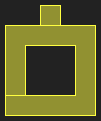

In [42]:
smart_etch_cell.write_svg('first_temp.svg',scaling = 0.5)
SVG('first_temp.svg')

In [43]:
holes = motor_tools.add_etch_holes(smart_etch_cell.get_polygonsets(), sg.etch_hole_size, sg.undercut, sg.not_layer, sg.lib, fracture = False, smaller_allowed=False, geometry='manhattan')
holes_smart = motor_tools.expand_etch_holes_smart(smart_etch_cell.get_polygonsets(), holes, sg.layer, sg.not_layer, sg.undercut,sg.etch_hole_size, lib, sg.datatype)

Release_test_cell1535389764928_5  is not anchored
Structure is released after 5 iterations 


In [44]:
smart_etch_cell.add(holes_smart)
anchors = motor_tools.compute_anchors(smart_etch_cell, motor_tools.UNDERCUT, motor_tools.SOI, motor_tools.SOI_HOLE)

smart_etch_cell  is not anchored


In [45]:
print(anchors)

None


In [46]:
holes[0].get_polygonsets()[0].polygons

[array([[ -81.42647353, -211.42647353],
        [ -81.42647353, -203.42647353],
        [ -73.42647353, -203.42647353],
        [ -73.42647353, -211.42647353]])]

In [47]:
# make sure it releases
motor_tools.compute_anchors(sg, motor_tools.UNDERCUT, layer = sg.layer, not_layer=sg.not_layer, output_layer=motor_tools.UNDERCUT, output_datatype=3)

Rotation without springs, central hub with maximum displacement of min feature

In [48]:
shuttle = motor_tools.RotShuttle(None, lib, (0,0), 100, 150, etch_size=8, etch_hole_params={'num_of_points': 12})
shuttle.draw_shuttle()
shuttle.draw_teeth(tooth_extension=0.5)
shuttle.draw_rothub(12)


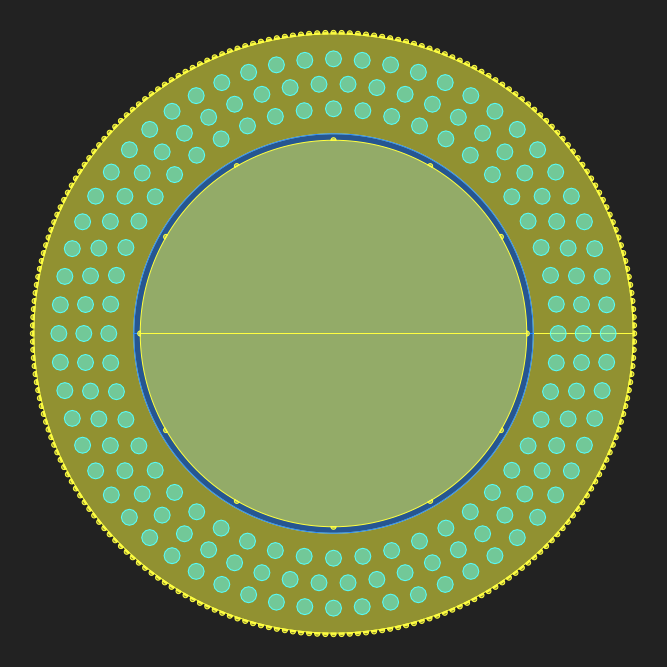

In [49]:
shuttle.write_svg('first_temp.svg', scaling =2)
SVG('first_temp.svg')

In [50]:
rotor = motor_tools.GCA(None, lib, 20)
rotor.draw()
full_motor = motor_tools.RotMotor(None, lib, rotor_triag, shuttle, 4)
full_motor.draw_gcas()

In [51]:
# rotor_triag.write_svg('first_temp.svg', scaling =2)
# SVG('first_temp.svg')

## singulation

In [52]:
motor_tools.add_trench(full_motor)

(<gdspy.polygon.PolygonSet at 0x16579c66e40>,
 <gdspy.polygon.PolygonSet at 0x16579c66dc0>)

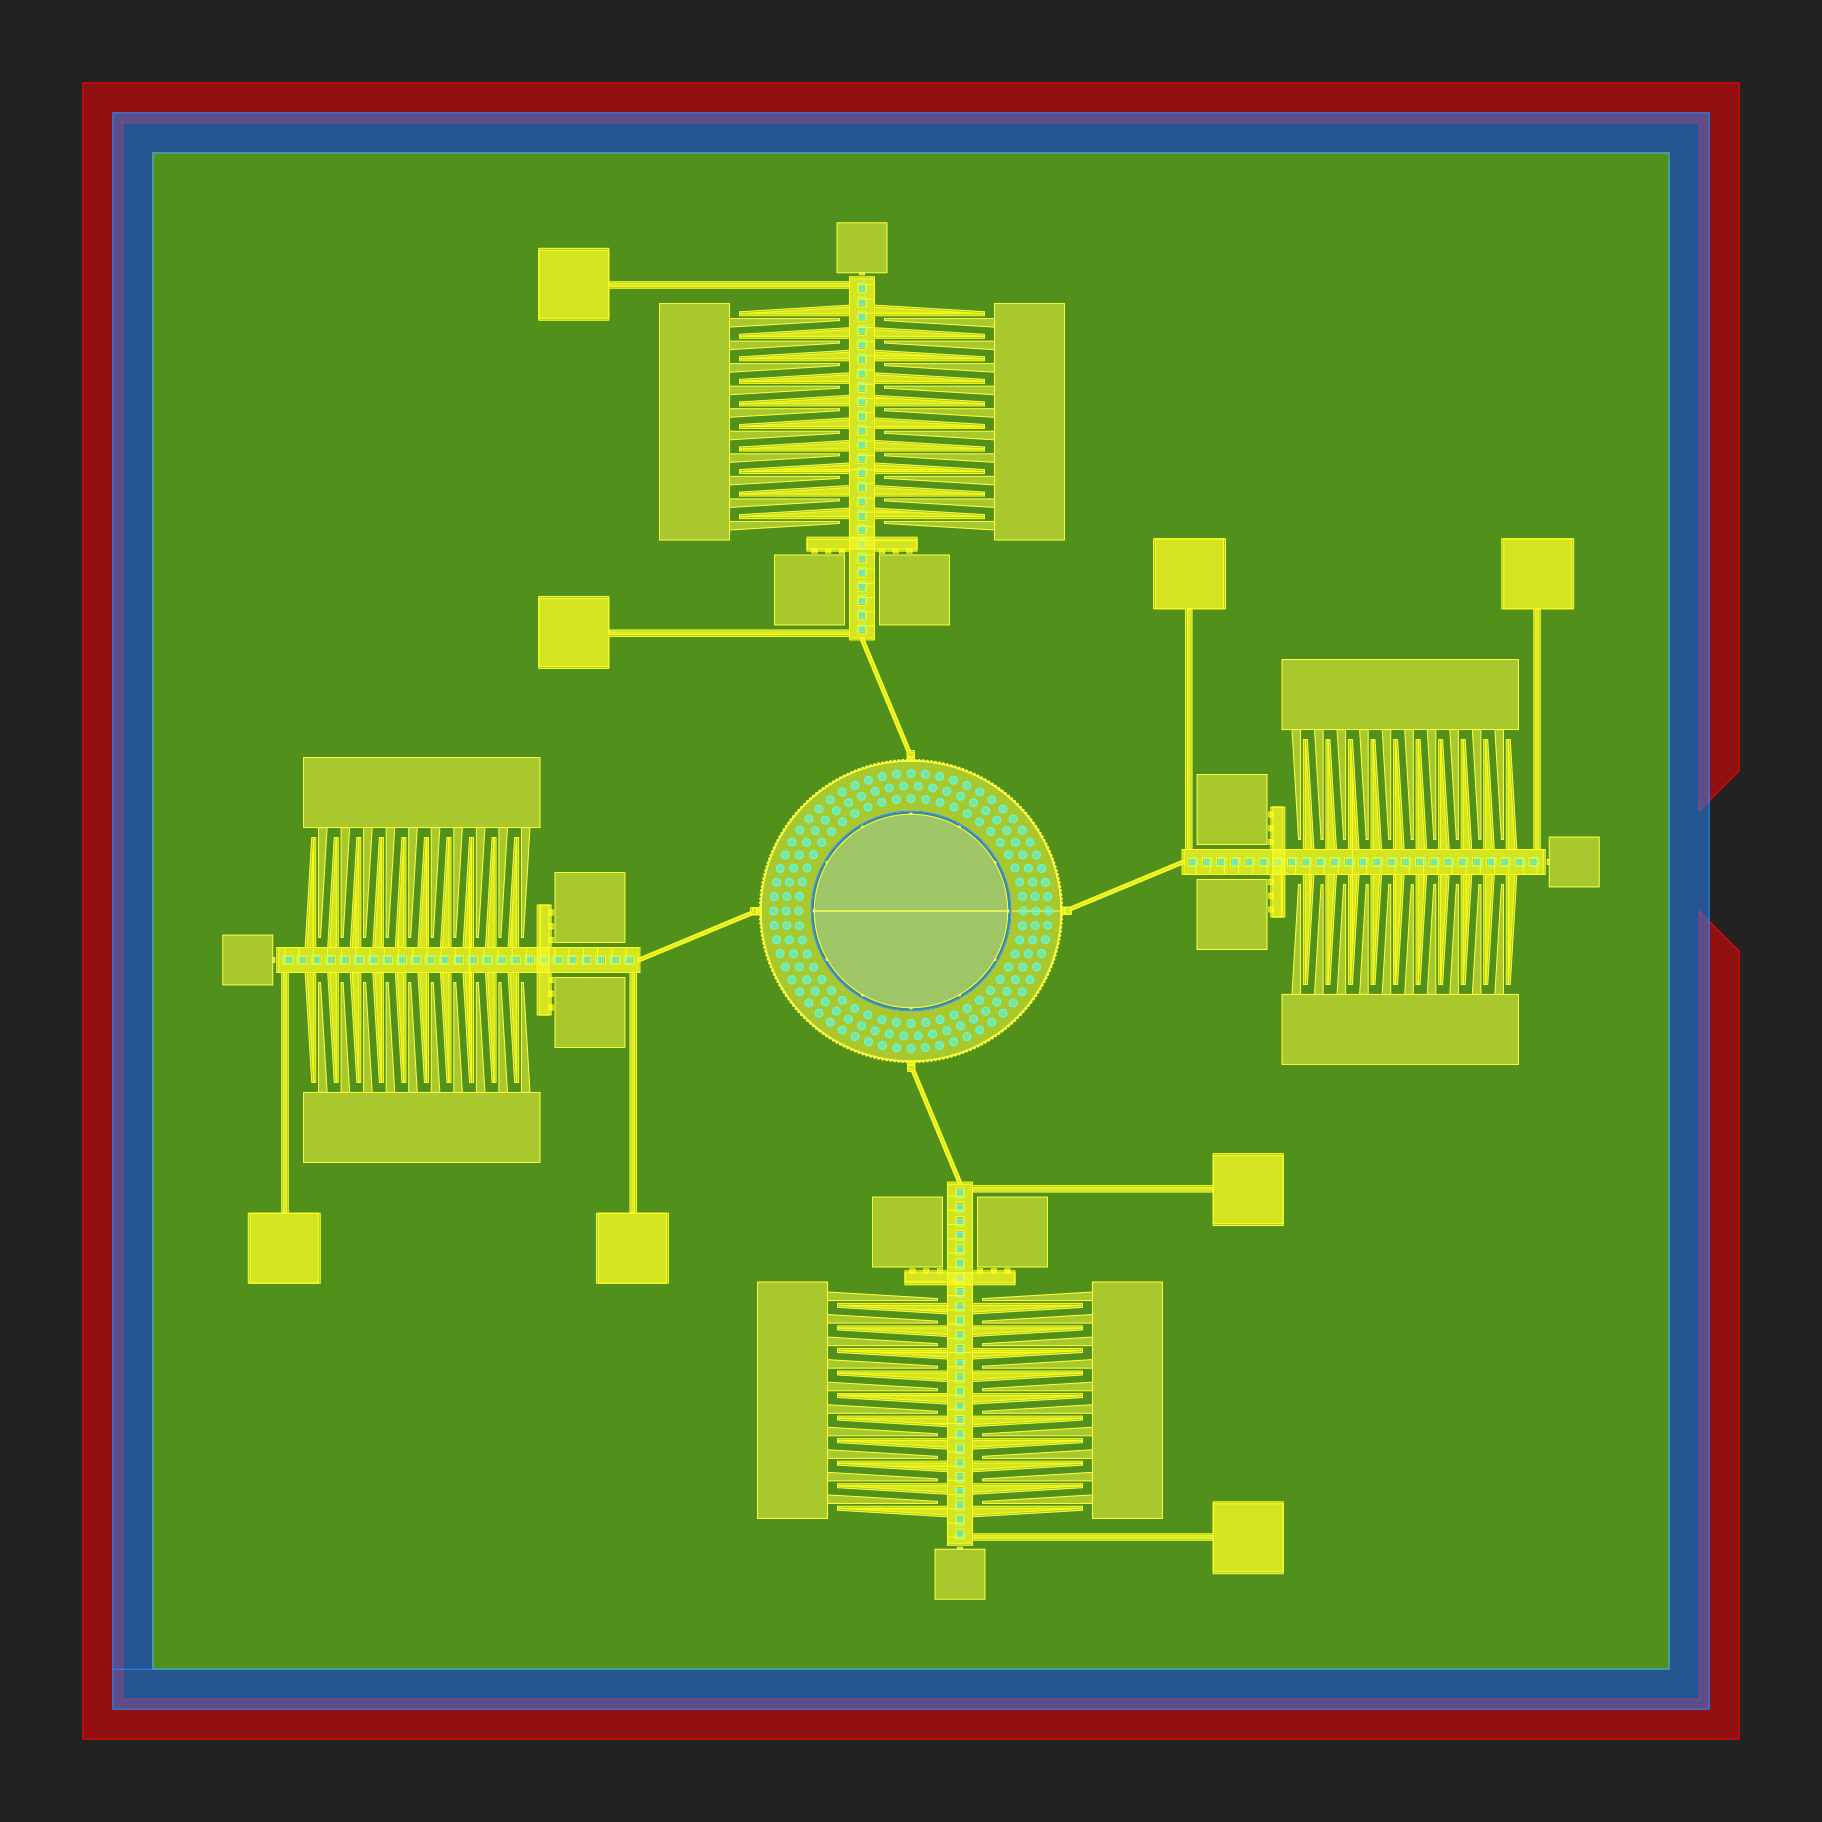

In [53]:
full_motor.write_svg('sec_temp.svg', scaling =1)
SVG('sec_temp.svg')

# BondingPillar

Adds an electrically isolated pillar for bonding between both wafers

In [54]:
pillar = motor_tools.BondingPillar(None, lib, 500, 600)



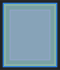

In [55]:
pillar.write_svg('first_temp.svg', scaling =0.1)
SVG('first_temp.svg')

# Exporting layout as GDS

Usually, we place references to a top cell to structure the layout

In [56]:
top_cell = lib.new_cell('TOP')
top_cell.add(gdspy.CellArray(etch_cell,2,3, (1000,800), (0,0)))
top_cell.add(gdspy.CellReference(motor_vars, (-1000,0)))
top_cell.add(gdspy.CellReference(spiral, (-1000,1000)))
top_cell.add(gdspy.CellReference(spiralL, (-2000,1000)))
top_cell.add(gdspy.CellReference(text_cell, (0, -1000)))
top_cell.add(gdspy.CellReference(shuttle, (-1600,1000)))
top_cell.add(gdspy.CellReference(full_motor, (-4600,1000)))
top_cell.add(gdspy.CellReference(pillar, (-4600,-2000)))
top_cell.add(gdspy.CellReference(rotor_triag, (-5000, -3000)))
top_cell.add(gdspy.CellReference(smart_cell, (1000, -1000)))
top_cell.add(gdspy.CellReference(dumb_cell, (1000, -1300)))
print(lib.top_level())

[<gdspy.library.Cell object at 0x000001657C5FC160>, <motor_tools.GCA object at 0x0000016579C6D270>, <motor_tools.SpringGauge object at 0x000001657C62B430>, <motor_tools.GCApar object at 0x0000016579CCC580>, <motor_tools.GCA object at 0x000001657C49A5F0>, <gdspy.library.Cell object at 0x000001657C4B35E0>, <gdspy.library.Cell object at 0x000001657BF96B80>, <motor_tools.SingleFlexure object at 0x000001657991BC10>, <motor_tools.RotShuttle object at 0x0000016579C1AC80>]


In [57]:
lib.write_gds('function_testing.gds')
# lib.write_gds('first_temp.gds')

In [58]:
os.startfile('function_testing.gds')